In [1]:
import torch
import torch.optim as optim
import torch.utils.data
import torch.backends.cudnn as cudnn
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [39]:
#--- hyperparameters ---
N_EPOCHS = 5
BATCH_SIZE_TRAIN = 100
BATCH_SIZE_TEST = 100
LR = 0.01

In [3]:
#--- fixed constants ---
NUM_CLASSES = 24
DATA_DIR = '../data/sign_mnist_%s'

In [23]:
# --- Dataset initialization ---

# We transform image files' contents to tensors
# Plus, we can add random transformations to the training data if we like
# Think on what kind of transformations may be meaningful for this data.
# Eg., horizontal-flip is definitely a bad idea for sign language data.
# You can use another transformation here if you find a better one.
train_transform = transforms.Compose([
                                        #transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor()])
test_transform = transforms.Compose([transforms.ToTensor()])

train_set = datasets.ImageFolder(DATA_DIR % 'train', transform=train_transform)
dev_set   = datasets.ImageFolder(DATA_DIR % 'dev',   transform=test_transform)
test_set  = datasets.ImageFolder(DATA_DIR % 'test',  transform=test_transform)


# Create Pytorch data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE_TRAIN, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE_TEST, shuffle=False)

In [5]:
#--- model ---
class CNN(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc = nn.Linear(7*7*32, NUM_CLASSES)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


In [43]:
#--- set up ---
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

model = CNN().to(device)

# WRITE CODE HERE
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=0.01)
loss_function = nn.CrossEntropyLoss()

#--- training ---
for epoch in range(N_EPOCHS):
    train_loss = 0
    train_correct = 0
    total = 0
    for batch_num, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Compute prediction error
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_function(pred, target)

        train_loss += loss.item()
        
        total += len(target)
        train_correct += torch.sum(pred.argmax(1) == target)
        
        # Backpropagation
        loss.backward()
        optimizer.step()

        print('Training: Epoch %d - Batch %d/%d: Loss: %.4f | Train Acc: %.3f%% (%d/%d)' % 
              (epoch, batch_num, len(train_loader), train_loss / (batch_num + 1), 
               100. * train_correct / total, train_correct, total))
    
    # WRITE CODE HERE
    # Please implement early stopping here.
    # You can try different versions, simplest way is to calculate the dev error and
    # compare this with the previous dev error, stopping if the error has grown.
    

Training: Epoch 0 - Batch 0/275: Loss: 3.3248 | Train Acc: 4.000% (4/100)
Training: Epoch 0 - Batch 1/275: Loss: 7.8131 | Train Acc: 4.500% (9/200)
Training: Epoch 0 - Batch 2/275: Loss: 8.7078 | Train Acc: 4.000% (12/300)
Training: Epoch 0 - Batch 3/275: Loss: 8.8968 | Train Acc: 4.250% (17/400)
Training: Epoch 0 - Batch 4/275: Loss: 9.0919 | Train Acc: 5.800% (29/500)
Training: Epoch 0 - Batch 5/275: Loss: 8.9519 | Train Acc: 7.500% (45/600)
Training: Epoch 0 - Batch 6/275: Loss: 8.8122 | Train Acc: 9.286% (65/700)
Training: Epoch 0 - Batch 7/275: Loss: 8.6279 | Train Acc: 9.500% (76/800)
Training: Epoch 0 - Batch 8/275: Loss: 8.4315 | Train Acc: 10.000% (90/900)
Training: Epoch 0 - Batch 9/275: Loss: 8.2624 | Train Acc: 9.900% (99/1000)
Training: Epoch 0 - Batch 10/275: Loss: 8.0608 | Train Acc: 10.545% (116/1100)
Training: Epoch 0 - Batch 11/275: Loss: 7.9048 | Train Acc: 10.750% (129/1200)
Training: Epoch 0 - Batch 12/275: Loss: 7.6642 | Train Acc: 11.385% (148/1300)
Training: Epo

Training: Epoch 0 - Batch 105/275: Loss: 2.0749 | Train Acc: 57.387% (6083/10600)
Training: Epoch 0 - Batch 106/275: Loss: 2.0593 | Train Acc: 57.692% (6173/10700)
Training: Epoch 0 - Batch 107/275: Loss: 2.0437 | Train Acc: 57.972% (6261/10800)
Training: Epoch 0 - Batch 108/275: Loss: 2.0274 | Train Acc: 58.266% (6351/10900)
Training: Epoch 0 - Batch 109/275: Loss: 2.0120 | Train Acc: 58.564% (6442/11000)
Training: Epoch 0 - Batch 110/275: Loss: 1.9962 | Train Acc: 58.883% (6536/11100)
Training: Epoch 0 - Batch 111/275: Loss: 1.9807 | Train Acc: 59.188% (6629/11200)
Training: Epoch 0 - Batch 112/275: Loss: 1.9657 | Train Acc: 59.469% (6720/11300)
Training: Epoch 0 - Batch 113/275: Loss: 1.9509 | Train Acc: 59.772% (6814/11400)
Training: Epoch 0 - Batch 114/275: Loss: 1.9365 | Train Acc: 60.052% (6906/11500)
Training: Epoch 0 - Batch 115/275: Loss: 1.9222 | Train Acc: 60.302% (6995/11600)
Training: Epoch 0 - Batch 116/275: Loss: 1.9080 | Train Acc: 60.564% (7086/11700)
Training: Epoch 

Training: Epoch 0 - Batch 209/275: Loss: 1.1341 | Train Acc: 76.500% (16065/21000)
Training: Epoch 0 - Batch 210/275: Loss: 1.1293 | Train Acc: 76.611% (16165/21100)
Training: Epoch 0 - Batch 211/275: Loss: 1.1244 | Train Acc: 76.717% (16264/21200)
Training: Epoch 0 - Batch 212/275: Loss: 1.1196 | Train Acc: 76.812% (16361/21300)
Training: Epoch 0 - Batch 213/275: Loss: 1.1148 | Train Acc: 76.921% (16461/21400)
Training: Epoch 0 - Batch 214/275: Loss: 1.1099 | Train Acc: 77.028% (16561/21500)
Training: Epoch 0 - Batch 215/275: Loss: 1.1052 | Train Acc: 77.130% (16660/21600)
Training: Epoch 0 - Batch 216/275: Loss: 1.1005 | Train Acc: 77.235% (16760/21700)
Training: Epoch 0 - Batch 217/275: Loss: 1.0960 | Train Acc: 77.330% (16858/21800)
Training: Epoch 0 - Batch 218/275: Loss: 1.0914 | Train Acc: 77.425% (16956/21900)
Training: Epoch 0 - Batch 219/275: Loss: 1.0869 | Train Acc: 77.514% (17053/22000)
Training: Epoch 0 - Batch 220/275: Loss: 1.0827 | Train Acc: 77.597% (17149/22100)
Trai

Training: Epoch 1 - Batch 38/275: Loss: 0.1175 | Train Acc: 97.590% (3806/3900)
Training: Epoch 1 - Batch 39/275: Loss: 0.1158 | Train Acc: 97.650% (3906/4000)
Training: Epoch 1 - Batch 40/275: Loss: 0.1149 | Train Acc: 97.707% (4006/4100)
Training: Epoch 1 - Batch 41/275: Loss: 0.1137 | Train Acc: 97.762% (4106/4200)
Training: Epoch 1 - Batch 42/275: Loss: 0.1125 | Train Acc: 97.814% (4206/4300)
Training: Epoch 1 - Batch 43/275: Loss: 0.1111 | Train Acc: 97.864% (4306/4400)
Training: Epoch 1 - Batch 44/275: Loss: 0.1103 | Train Acc: 97.889% (4405/4500)
Training: Epoch 1 - Batch 45/275: Loss: 0.1094 | Train Acc: 97.935% (4505/4600)
Training: Epoch 1 - Batch 46/275: Loss: 0.1087 | Train Acc: 97.957% (4604/4700)
Training: Epoch 1 - Batch 47/275: Loss: 0.1079 | Train Acc: 97.979% (4703/4800)
Training: Epoch 1 - Batch 48/275: Loss: 0.1067 | Train Acc: 98.020% (4803/4900)
Training: Epoch 1 - Batch 49/275: Loss: 0.1063 | Train Acc: 98.040% (4902/5000)
Training: Epoch 1 - Batch 50/275: Loss: 

Training: Epoch 1 - Batch 143/275: Loss: 0.0977 | Train Acc: 98.396% (14169/14400)
Training: Epoch 1 - Batch 144/275: Loss: 0.0980 | Train Acc: 98.379% (14265/14500)
Training: Epoch 1 - Batch 145/275: Loss: 0.0983 | Train Acc: 98.363% (14361/14600)
Training: Epoch 1 - Batch 146/275: Loss: 0.0987 | Train Acc: 98.354% (14458/14700)
Training: Epoch 1 - Batch 147/275: Loss: 0.0998 | Train Acc: 98.331% (14553/14800)
Training: Epoch 1 - Batch 148/275: Loss: 0.1002 | Train Acc: 98.315% (14649/14900)
Training: Epoch 1 - Batch 149/275: Loss: 0.1010 | Train Acc: 98.280% (14742/15000)
Training: Epoch 1 - Batch 150/275: Loss: 0.1010 | Train Acc: 98.285% (14841/15100)
Training: Epoch 1 - Batch 151/275: Loss: 0.1020 | Train Acc: 98.257% (14935/15200)
Training: Epoch 1 - Batch 152/275: Loss: 0.1022 | Train Acc: 98.248% (15032/15300)
Training: Epoch 1 - Batch 153/275: Loss: 0.1030 | Train Acc: 98.221% (15126/15400)
Training: Epoch 1 - Batch 154/275: Loss: 0.1032 | Train Acc: 98.206% (15222/15500)
Trai

Training: Epoch 1 - Batch 246/275: Loss: 0.0994 | Train Acc: 98.283% (24276/24700)
Training: Epoch 1 - Batch 247/275: Loss: 0.0993 | Train Acc: 98.286% (24375/24800)
Training: Epoch 1 - Batch 248/275: Loss: 0.0995 | Train Acc: 98.281% (24472/24900)
Training: Epoch 1 - Batch 249/275: Loss: 0.0994 | Train Acc: 98.284% (24571/25000)
Training: Epoch 1 - Batch 250/275: Loss: 0.0993 | Train Acc: 98.283% (24669/25100)
Training: Epoch 1 - Batch 251/275: Loss: 0.0994 | Train Acc: 98.278% (24766/25200)
Training: Epoch 1 - Batch 252/275: Loss: 0.0998 | Train Acc: 98.265% (24861/25300)
Training: Epoch 1 - Batch 253/275: Loss: 0.0997 | Train Acc: 98.264% (24959/25400)
Training: Epoch 1 - Batch 254/275: Loss: 0.0998 | Train Acc: 98.263% (25057/25500)
Training: Epoch 1 - Batch 255/275: Loss: 0.0999 | Train Acc: 98.258% (25154/25600)
Training: Epoch 1 - Batch 256/275: Loss: 0.1000 | Train Acc: 98.257% (25252/25700)
Training: Epoch 1 - Batch 257/275: Loss: 0.0999 | Train Acc: 98.264% (25352/25800)
Trai

Training: Epoch 2 - Batch 75/275: Loss: 0.0986 | Train Acc: 98.079% (7454/7600)
Training: Epoch 2 - Batch 76/275: Loss: 0.0987 | Train Acc: 98.078% (7552/7700)
Training: Epoch 2 - Batch 77/275: Loss: 0.0984 | Train Acc: 98.103% (7652/7800)
Training: Epoch 2 - Batch 78/275: Loss: 0.0978 | Train Acc: 98.114% (7751/7900)
Training: Epoch 2 - Batch 79/275: Loss: 0.0982 | Train Acc: 98.113% (7849/8000)
Training: Epoch 2 - Batch 80/275: Loss: 0.0981 | Train Acc: 98.123% (7948/8100)
Training: Epoch 2 - Batch 81/275: Loss: 0.0978 | Train Acc: 98.146% (8048/8200)
Training: Epoch 2 - Batch 82/275: Loss: 0.0976 | Train Acc: 98.145% (8146/8300)
Training: Epoch 2 - Batch 83/275: Loss: 0.0975 | Train Acc: 98.155% (8245/8400)
Training: Epoch 2 - Batch 84/275: Loss: 0.0969 | Train Acc: 98.176% (8345/8500)
Training: Epoch 2 - Batch 85/275: Loss: 0.0967 | Train Acc: 98.174% (8443/8600)
Training: Epoch 2 - Batch 86/275: Loss: 0.0963 | Train Acc: 98.184% (8542/8700)
Training: Epoch 2 - Batch 87/275: Loss: 

Training: Epoch 2 - Batch 178/275: Loss: 0.0955 | Train Acc: 98.223% (17582/17900)
Training: Epoch 2 - Batch 179/275: Loss: 0.0959 | Train Acc: 98.206% (17677/18000)
Training: Epoch 2 - Batch 180/275: Loss: 0.0959 | Train Acc: 98.204% (17775/18100)
Training: Epoch 2 - Batch 181/275: Loss: 0.0957 | Train Acc: 98.214% (17875/18200)
Training: Epoch 2 - Batch 182/275: Loss: 0.0960 | Train Acc: 98.197% (17970/18300)
Training: Epoch 2 - Batch 183/275: Loss: 0.0959 | Train Acc: 98.201% (18069/18400)
Training: Epoch 2 - Batch 184/275: Loss: 0.0959 | Train Acc: 98.211% (18169/18500)
Training: Epoch 2 - Batch 185/275: Loss: 0.0963 | Train Acc: 98.199% (18265/18600)
Training: Epoch 2 - Batch 186/275: Loss: 0.0963 | Train Acc: 98.198% (18363/18700)
Training: Epoch 2 - Batch 187/275: Loss: 0.0963 | Train Acc: 98.202% (18462/18800)
Training: Epoch 2 - Batch 188/275: Loss: 0.0982 | Train Acc: 98.159% (18552/18900)
Training: Epoch 2 - Batch 189/275: Loss: 0.0982 | Train Acc: 98.168% (18652/19000)
Trai

Training: Epoch 3 - Batch 3/275: Loss: 0.0654 | Train Acc: 99.250% (397/400)
Training: Epoch 3 - Batch 4/275: Loss: 0.0667 | Train Acc: 99.400% (497/500)
Training: Epoch 3 - Batch 5/275: Loss: 0.0653 | Train Acc: 99.333% (596/600)
Training: Epoch 3 - Batch 6/275: Loss: 0.0625 | Train Acc: 99.286% (695/700)
Training: Epoch 3 - Batch 7/275: Loss: 0.0621 | Train Acc: 99.375% (795/800)
Training: Epoch 3 - Batch 8/275: Loss: 0.0599 | Train Acc: 99.444% (895/900)
Training: Epoch 3 - Batch 9/275: Loss: 0.0603 | Train Acc: 99.400% (994/1000)
Training: Epoch 3 - Batch 10/275: Loss: 0.0579 | Train Acc: 99.455% (1094/1100)
Training: Epoch 3 - Batch 11/275: Loss: 0.0557 | Train Acc: 99.500% (1194/1200)
Training: Epoch 3 - Batch 12/275: Loss: 0.0545 | Train Acc: 99.538% (1294/1300)
Training: Epoch 3 - Batch 13/275: Loss: 0.0534 | Train Acc: 99.571% (1394/1400)
Training: Epoch 3 - Batch 14/275: Loss: 0.0528 | Train Acc: 99.600% (1494/1500)
Training: Epoch 3 - Batch 15/275: Loss: 0.0518 | Train Acc: 

Training: Epoch 3 - Batch 106/275: Loss: 0.0731 | Train Acc: 99.047% (10598/10700)
Training: Epoch 3 - Batch 107/275: Loss: 0.0732 | Train Acc: 99.037% (10696/10800)
Training: Epoch 3 - Batch 108/275: Loss: 0.0731 | Train Acc: 99.037% (10795/10900)
Training: Epoch 3 - Batch 109/275: Loss: 0.0730 | Train Acc: 99.036% (10894/11000)
Training: Epoch 3 - Batch 110/275: Loss: 0.0731 | Train Acc: 99.036% (10993/11100)
Training: Epoch 3 - Batch 111/275: Loss: 0.0730 | Train Acc: 99.045% (11093/11200)
Training: Epoch 3 - Batch 112/275: Loss: 0.0729 | Train Acc: 99.053% (11193/11300)
Training: Epoch 3 - Batch 113/275: Loss: 0.0734 | Train Acc: 99.035% (11290/11400)
Training: Epoch 3 - Batch 114/275: Loss: 0.0738 | Train Acc: 99.026% (11388/11500)
Training: Epoch 3 - Batch 115/275: Loss: 0.0740 | Train Acc: 99.017% (11486/11600)
Training: Epoch 3 - Batch 116/275: Loss: 0.0744 | Train Acc: 99.000% (11583/11700)
Training: Epoch 3 - Batch 117/275: Loss: 0.0745 | Train Acc: 99.000% (11682/11800)
Trai

Training: Epoch 3 - Batch 209/275: Loss: 0.0999 | Train Acc: 98.129% (20607/21000)
Training: Epoch 3 - Batch 210/275: Loss: 0.1002 | Train Acc: 98.123% (20704/21100)
Training: Epoch 3 - Batch 211/275: Loss: 0.1001 | Train Acc: 98.123% (20802/21200)
Training: Epoch 3 - Batch 212/275: Loss: 0.1002 | Train Acc: 98.122% (20900/21300)
Training: Epoch 3 - Batch 213/275: Loss: 0.1004 | Train Acc: 98.112% (20996/21400)
Training: Epoch 3 - Batch 214/275: Loss: 0.1005 | Train Acc: 98.107% (21093/21500)
Training: Epoch 3 - Batch 215/275: Loss: 0.1004 | Train Acc: 98.106% (21191/21600)
Training: Epoch 3 - Batch 216/275: Loss: 0.1002 | Train Acc: 98.111% (21290/21700)
Training: Epoch 3 - Batch 217/275: Loss: 0.1004 | Train Acc: 98.101% (21386/21800)
Training: Epoch 3 - Batch 218/275: Loss: 0.1004 | Train Acc: 98.100% (21484/21900)
Training: Epoch 3 - Batch 219/275: Loss: 0.1003 | Train Acc: 98.109% (21584/22000)
Training: Epoch 3 - Batch 220/275: Loss: 0.1005 | Train Acc: 98.104% (21681/22100)
Trai

Training: Epoch 4 - Batch 38/275: Loss: 0.0852 | Train Acc: 98.949% (3859/3900)
Training: Epoch 4 - Batch 39/275: Loss: 0.0849 | Train Acc: 98.950% (3958/4000)
Training: Epoch 4 - Batch 40/275: Loss: 0.0847 | Train Acc: 98.927% (4056/4100)
Training: Epoch 4 - Batch 41/275: Loss: 0.0840 | Train Acc: 98.952% (4156/4200)
Training: Epoch 4 - Batch 42/275: Loss: 0.0832 | Train Acc: 98.977% (4256/4300)
Training: Epoch 4 - Batch 43/275: Loss: 0.0828 | Train Acc: 99.000% (4356/4400)
Training: Epoch 4 - Batch 44/275: Loss: 0.0821 | Train Acc: 99.022% (4456/4500)
Training: Epoch 4 - Batch 45/275: Loss: 0.0815 | Train Acc: 99.043% (4556/4600)
Training: Epoch 4 - Batch 46/275: Loss: 0.0806 | Train Acc: 99.043% (4655/4700)
Training: Epoch 4 - Batch 47/275: Loss: 0.0799 | Train Acc: 99.062% (4755/4800)
Training: Epoch 4 - Batch 48/275: Loss: 0.0794 | Train Acc: 99.082% (4855/4900)
Training: Epoch 4 - Batch 49/275: Loss: 0.0788 | Train Acc: 99.100% (4955/5000)
Training: Epoch 4 - Batch 50/275: Loss: 

Training: Epoch 4 - Batch 144/275: Loss: 0.0919 | Train Acc: 98.531% (14287/14500)
Training: Epoch 4 - Batch 145/275: Loss: 0.0923 | Train Acc: 98.521% (14384/14600)
Training: Epoch 4 - Batch 146/275: Loss: 0.0934 | Train Acc: 98.497% (14479/14700)
Training: Epoch 4 - Batch 147/275: Loss: 0.0934 | Train Acc: 98.493% (14577/14800)
Training: Epoch 4 - Batch 148/275: Loss: 0.0941 | Train Acc: 98.477% (14673/14900)
Training: Epoch 4 - Batch 149/275: Loss: 0.0970 | Train Acc: 98.407% (14761/15000)
Training: Epoch 4 - Batch 150/275: Loss: 0.0974 | Train Acc: 98.371% (14854/15100)
Training: Epoch 4 - Batch 151/275: Loss: 0.0976 | Train Acc: 98.362% (14951/15200)
Training: Epoch 4 - Batch 152/275: Loss: 0.1004 | Train Acc: 98.294% (15039/15300)
Training: Epoch 4 - Batch 153/275: Loss: 0.1002 | Train Acc: 98.305% (15139/15400)
Training: Epoch 4 - Batch 154/275: Loss: 0.1011 | Train Acc: 98.277% (15233/15500)
Training: Epoch 4 - Batch 155/275: Loss: 0.1013 | Train Acc: 98.263% (15329/15600)
Trai

Training: Epoch 4 - Batch 244/275: Loss: 0.1022 | Train Acc: 98.029% (24017/24500)
Training: Epoch 4 - Batch 245/275: Loss: 0.1020 | Train Acc: 98.037% (24117/24600)
Training: Epoch 4 - Batch 246/275: Loss: 0.1017 | Train Acc: 98.045% (24217/24700)
Training: Epoch 4 - Batch 247/275: Loss: 0.1015 | Train Acc: 98.052% (24317/24800)
Training: Epoch 4 - Batch 248/275: Loss: 0.1016 | Train Acc: 98.048% (24414/24900)
Training: Epoch 4 - Batch 249/275: Loss: 0.1015 | Train Acc: 98.056% (24514/25000)
Training: Epoch 4 - Batch 250/275: Loss: 0.1013 | Train Acc: 98.064% (24614/25100)
Training: Epoch 4 - Batch 251/275: Loss: 0.1012 | Train Acc: 98.063% (24712/25200)
Training: Epoch 4 - Batch 252/275: Loss: 0.1011 | Train Acc: 98.067% (24811/25300)
Training: Epoch 4 - Batch 253/275: Loss: 0.1010 | Train Acc: 98.075% (24911/25400)
Training: Epoch 4 - Batch 254/275: Loss: 0.1008 | Train Acc: 98.082% (25011/25500)
Training: Epoch 4 - Batch 255/275: Loss: 0.1007 | Train Acc: 98.082% (25109/25600)
Trai

Evaluating: Batch 0/37: Loss: 0.2574 | Test Acc: 91.000% (91/100)
Evaluating: Batch 1/37: Loss: 0.2947 | Test Acc: 91.000% (182/200)
Evaluating: Batch 2/37: Loss: 0.2720 | Test Acc: 91.000% (273/300)
Evaluating: Batch 3/37: Loss: 0.2879 | Test Acc: 91.000% (364/400)
Evaluating: Batch 4/37: Loss: 0.2807 | Test Acc: 91.600% (458/500)
Evaluating: Batch 5/37: Loss: 0.2818 | Test Acc: 91.333% (548/600)
Evaluating: Batch 6/37: Loss: 0.2792 | Test Acc: 91.571% (641/700)
Evaluating: Batch 7/37: Loss: 0.2901 | Test Acc: 91.125% (729/800)
Evaluating: Batch 8/37: Loss: 0.2896 | Test Acc: 91.222% (821/900)
Evaluating: Batch 9/37: Loss: 0.3013 | Test Acc: 90.900% (909/1000)
Evaluating: Batch 10/37: Loss: 0.2910 | Test Acc: 91.273% (1004/1100)
Evaluating: Batch 11/37: Loss: 0.2872 | Test Acc: 91.500% (1098/1200)
Evaluating: Batch 12/37: Loss: 0.2806 | Test Acc: 91.769% (1193/1300)
Evaluating: Batch 13/37: Loss: 0.2803 | Test Acc: 91.929% (1287/1400)
Evaluating: Batch 14/37: Loss: 0.2836 | Test Acc: 

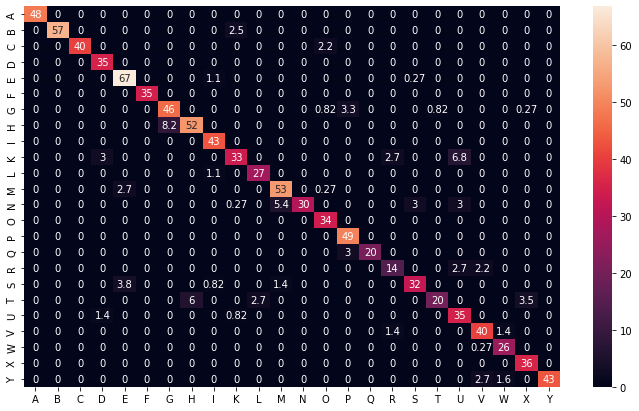

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

#--- test ---
test_loss = 0
test_correct = 0
total = 0

preds = []
targets = []

with torch.no_grad():
    for batch_num, (data, target) in enumerate(test_loader):
        data, target = data.to(device), target.to(device)
        
        pred = model(data)
        loss = loss_function(pred, target)
        
        test_loss += loss.item()
        total += len(target)
        test_correct += torch.sum(pred.argmax(1) == target)
        preds.extend(pred.argmax(1).cpu().numpy())
        targets.extend(target.cpu().numpy())

        print('Evaluating: Batch %d/%d: Loss: %.4f | Test Acc: %.3f%% (%d/%d)' % 
              (batch_num, len(test_loader), test_loss / (batch_num + 1), 
               100. * test_correct / total, test_correct, total))

    cf_matrix = confusion_matrix(targets, preds)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix) * 1000, 
                         index = [i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'],
                         columns=[i for i in 'ABCDEFGHIKLMNOPQRSTUVWXY'])
    plt.figure(figsize=(12, 7))
    sn.heatmap(df_cm, annot=True)